In [ ]:
#@title Default title text
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')


# Get the number of rows and columns in the dataset
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the number of rows and columns
print('Number of rows:', num_rows)
print('Number of columns:', num_cols)

countries = df['Country'].unique()
print(countries)


# Display the first 5 rows of the dataframe
print(df.head())


Number of rows: 541909
Number of columns: 8
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55    

### ***DATA PREPROCESSING***

***CHECK FOR THE MISSING VALUE IN THE DESCRIPTION COLUMN ***

In [ ]:
# Check for missing values in the 'Description' column
print(df['Description'].isnull().sum())

# Fill in missing values with mode value
mode_value = df['Description'].mode()[0]
df['Description'].fillna(mode_value, inplace=True)

1454


In [ ]:
# Check for missing values in the 'Description' column
print(df['Description'].isnull().sum())


0


**Create a new column for total amount spent per customer**

In [ ]:
# Create a new column for total amount spent per customer
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Group the data by customer ID and calculate total amount spent and frequency of purchases
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',     # Frequency of purchases
    'TotalAmount': 'sum'        # Total amount spent
}).reset_index()

In [ ]:
print(customer_data.head())

   CustomerID  InvoiceNo  TotalAmount
0     12346.0          2         0.00
1     12347.0          7      4310.00
2     12348.0          4      1797.24
3     12349.0          1      1757.55
4     12350.0          1       334.40


In [ ]:
# Rename the columns to more descriptive names
customer_data.rename(columns={'InvoiceNo': 'Frequency', 'TotalAmount': 'MonetaryValue'}, inplace=True)

In [ ]:
# Write the dataframe to a CSV file
customer_data.to_csv('customer_metrics.csv', index=False)

# Display a message to confirm that the file has been created
print('CSV file created successfully')


CSV file created successfully


# Exp Data Analytics

VISUALIZATION OF CUSTOMER METRICS CSV FILE USING DIFFERNET PLOTTING TECHNIQUE

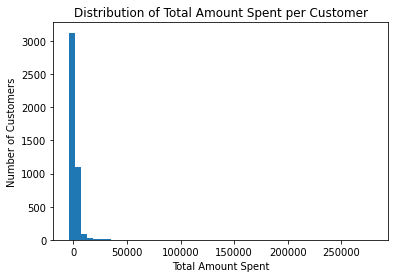

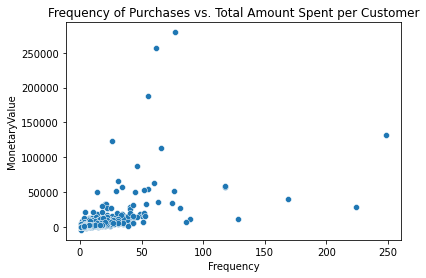

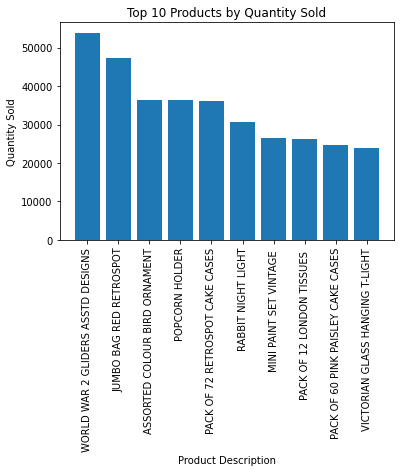

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a histogram of the total amount spent per customer
plt.hist(customer_data['MonetaryValue'], bins=50)
plt.title('Distribution of Total Amount Spent per Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.show()

# Plot a scatterplot of frequency of purchases vs. total amount spent
sns.scatterplot(data=customer_data, x='Frequency', y='MonetaryValue')
plt.title('Frequency of Purchases vs. Total Amount Spent per Customer')
plt.show()

# Plot a bar chart of the top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=90)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
# Find potential outliers
q1 = customer_data['MonetaryValue'].quantile(0.25)
q3 = customer_data['MonetaryValue'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
potential_outliers = customer_data[(customer_data['MonetaryValue'] > upper_bound) | (customer_data['MonetaryValue'] < lower_bound)]
print('Potential outliers:', potential_outliers)


Potential outliers:       CustomerID  Frequency  MonetaryValue
1        12347.0          7        4310.00
10       12357.0          1        6207.67
12       12359.0          6        6245.53
15       12362.0         13        5154.58
27       12378.0          1        4008.62
...          ...        ...            ...
4324     18223.0         27        6315.23
4326     18225.0         17        5361.02
4327     18226.0         14        5192.10
4330     18229.0         20        7276.90
4347     18251.0          1        4314.72

[423 rows x 3 columns]


Text(0, 0.5, 'Frequency')

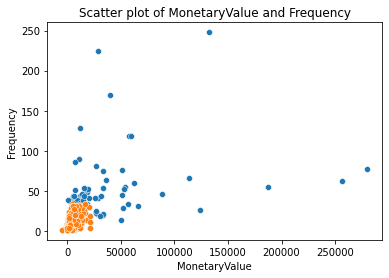

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
sns.scatterplot(x='MonetaryValue', y='Frequency', data=customer_data)

# Calculate z-scores
z_scores = (customer_data[['MonetaryValue', 'Frequency']] - customer_data[['MonetaryValue', 'Frequency']].mean()) / customer_data[['MonetaryValue', 'Frequency']].std()

# Identify outliers using z-scores
outliers = (z_scores['MonetaryValue'].abs() > 3) | (z_scores['Frequency'].abs() > 3)

# Mask outliers from the scatter plot
sns.scatterplot(x='MonetaryValue', y='Frequency', data=customer_data[~outliers])

# Add title and axis labels
plt.title('Scatter plot of MonetaryValue and Frequency')
plt.xlabel('MonetaryValue')
plt.ylabel('Frequency')



# **Calculate the most popular product**

Most popular products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
Name: Quantity, dtype: int64
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount',
       'TotalPurchaseAmount'],
      dtype='object')


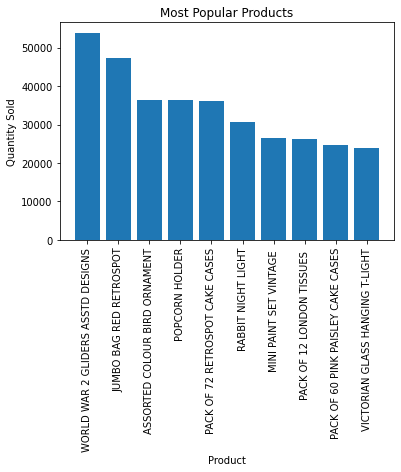

In [ ]:


# Calculate the most popular products
most_popular_products = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)[:10]
print('Most popular products:')
print(most_popular_products)
print(df.columns)




# Create a bar chart of the most popular products
plt.bar(most_popular_products.index, most_popular_products.values)
plt.xticks(rotation=90)
plt.title('Most Popular Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()



# VISUALIZATION OF DATA W.R.T COUNTRIES + APRIORI ALGORITHM DATA MINING TECHNIQUE

In [ ]:
countries = df['Country'].unique()
print(countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
import pandas as pd

# Create a new dataframe with the total quantities for each country
country_totals = df.groupby('Country')['Quantity'].sum().reset_index()

# Pivot the data to create a table
table = pd.pivot_table(country_totals, values='Quantity', index='Country')

# Display the table
print(table)

                      Quantity
Country                       
Australia                83653
Austria                   4827
Bahrain                    260
Belgium                  23152
Brazil                     356
Canada                    2763
Channel Islands           9479
Cyprus                    6317
Czech Republic             592
Denmark                   8188
EIRE                    142637
European Community         497
Finland                  10666
France                  110480
Germany                 117448
Greece                    1556
Hong Kong                 4769
Iceland                   2458
Israel                    4353
Italy                     7999
Japan                    25218
Lebanon                    386
Lithuania                  652
Malta                      944
Netherlands             200128
Norway                   19247
Poland                    3653
Portugal                 16180
RSA                        352
Saudi Arabia                75
Singapor

SORTING 

In [ ]:
# Sort the country_totals dataframe in descending order based on 'Quantity' column
sorted_country_totals = country_totals.sort_values('Quantity', ascending=False)

# Get the country with the highest quantity
highest_country = sorted_country_totals.iloc[0]['Country']
highest_quantity = sorted_country_totals.iloc[0]['Quantity']

# Print the country with the highest quantity
print(f"The country with the highest quantity is {highest_country} with {highest_quantity} total quantity.")


The country with the highest quantity is United Kingdom with 4263829 total quantity.


DATA PLOTTING

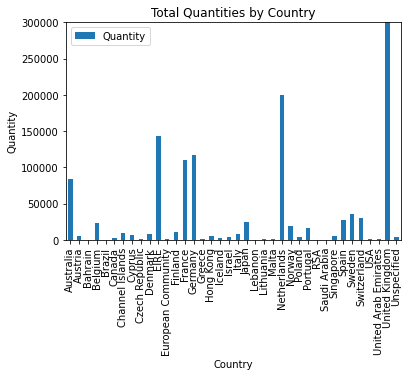

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new dataframe with the total quantities for each country
country_totals = df.groupby('Country')['Quantity'].sum().reset_index()

# Create a table plot using pandas
country_totals.plot(kind='bar', x='Country', y='Quantity')

# Set the plot title and axis labels
plt.title('Total Quantities by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')

# Set the y-axis limits
plt.ylim(0, 300000)

# Show the plot
plt.show()


CHOROPLETH MAP

In [ ]:
import plotly.express as px

# Calculate the total number of products sold in each country
country_product_counts = df.groupby('Country')['Quantity'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(country_product_counts, locations='Country', locationmode='country names', color='Quantity',
                    color_continuous_scale='RdBu', title='Number of Products Sold by Country')
fig.show()

APRIORI ALGORITHM - RECOMMENDATION SYSTEM - DATA MINING

In [ ]:
pip install mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [ ]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
         )
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(basket_sets, min_support=0.050, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.087336,0.082969,0.063319,0.725000,8.738158,0.056073,3.334657
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.082969,0.087336,0.063319,0.763158,8.738158,0.056073,3.853469
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.080786,0.082969,0.067686,0.837838,10.098151,0.060983,5.655022
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.082969,0.080786,0.067686,0.815789,10.098151,0.060983,4.990019
4,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.655022,0.082969,0.072052,0.110000,1.325789,0.017706,1.030371


In [ ]:
rules[(rules['lift'] >= 2) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.087336,0.082969,0.063319,0.725000,8.738158,0.056073,3.334657
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.082969,0.087336,0.063319,0.763158,8.738158,0.056073,3.853469
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.080786,0.082969,0.067686,0.837838,10.098151,0.060983,5.655022
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.082969,0.080786,0.067686,0.815789,10.098151,0.060983,4.990019
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.087336,0.080786,0.063319,0.725000,8.974324,0.056263,3.342596
...,...,...,...,...,...,...,...,...,...
222,"(SET/20 RED RETROSPOT PAPER NAPKINS , POSTAGE)","(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",0.093886,0.104803,0.069869,0.744186,7.100775,0.060029,3.499405
223,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...","(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",0.087336,0.091703,0.069869,0.800000,8.723810,0.061860,4.541485
224,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , POSTAGE,...",0.109170,0.072052,0.069869,0.640000,8.882424,0.062003,2.577632
226,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, SET/2...",0.117904,0.072052,0.069869,0.592593,8.224467,0.061374,2.277690


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_association_rules(data, x, y, size):
    """
    Plots association rule mining results as a scatterplot.
    
    Parameters:
    data (pandas DataFrame): The data to plot.
    x (str): The name of the column to plot on the x-axis.
    y (str): The name of the column to plot on the y-axis.
    size (str): The name of the column to use for the marker size.
    """
    sns.set_style("whitegrid")  # set the style of the plot
    fig, ax = plt.subplots(figsize=(10, 8))  # set the size of the plot

    # plot the scatterplot with customized aesthetics
    sns.scatterplot(x=x, y=y, size=size, data=data,
                    alpha=0.8, edgecolor='none', palette='viridis',
                    ax=ax)

    # add title and axis labels
    ax.set_title("Association Rule Mining Results", fontsize=18)
    ax.set_xlabel(x.title(), fontsize=14)
    ax.set_ylabel(y.title(), fontsize=14)

    # show the plot
    plt.show()


<ipython-input-22-1f3dbbba5223>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x, y=y, size=size, data=data,


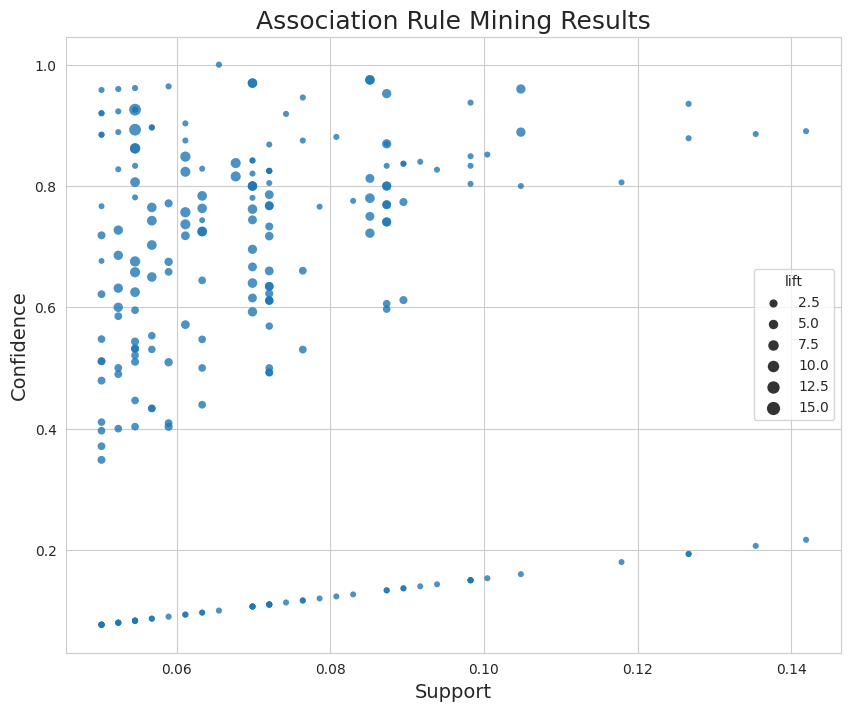

In [ ]:
plot_association_rules(rules, "support", "confidence", "lift")


# RECOMMENDATION SYSTEM USING COLLABORATIVE FILTERING

 Collaborative filtering is a technique commonly used in recommendation systems to suggest items to users based on the preferences of other similar users. In this code, two different types of collaborative filtering are used: user-user collaborative filtering and item-item collaborative filtering.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

# Filter out rows with missing CustomerID values
df = df[df['CustomerID'].notna()]

# Filter out customers with IDs outside the specified range
df = df[(df['CustomerID'] >= 12346) & (df['CustomerID'] <= 18287)]

# Convert Quantity column to integers
df.loc[:, 'Quantity'] = df['Quantity'].astype(int)

# Drop rows with missing values
df.dropna(inplace=True)

# Pivot the table to get customer-item matrix
customer_item_matrix = df.pivot_table(values='Quantity', index='CustomerID', columns='StockCode', aggfunc='sum', fill_value=0)

# Calculate user-user similarity matrix
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.index = customer_item_matrix.index
user_user_sim_matrix.columns = customer_item_matrix.index

# Define function to get items to recommend to a customer based on customer similarity
def get_items_to_recommend_cust(cust_a):
    # Check if customer exists in the customer-item matrix
    if cust_a not in customer_item_matrix.index:
        print(f"Customer {cust_a} is not available in the customer-item matrix.")
        return None
    
    # Find most similar customer
    most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).index[1]
    
    # Get items bought by both customers
    items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a][customer_item_matrix.loc[cust_a] > 0].index)
    items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user][customer_item_matrix.loc[most_similar_user] > 0].index)
    
    # Get items to recommend to the customer
    items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
    items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
    
    return items_description

# Get user input for customer ID
cust_id = input("Please enter a customer ID between 12346 and 18287: ")
cust_id = int(cust_id)

# Test the function with the user input
get_items_to_recommend_cust(cust_id)

# Calculate item-item similarity matrix
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.index = customer_item_matrix.columns
item_item_sim_matrix.columns = customer_item_matrix.columns

# Define function to get top similar items to an item
def get_top_similar_items(item):
    # Get top 10 most similar items
    top_10_similar_items = item_item_sim_matrix[item].sort_values(ascending=False).iloc[1:11].index
    
    # Get descriptions of the top similar items
    top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
    
    return top_10

# Get user input for item code
item_code = input("Please enter an item code sample 22423, 47566: ")

# Test the function with the user input
get_top_similar_items(item_code)


Please enter a customer ID between 12346 and 18287: 18287
Please enter an item code: 22423


,Description
StockCode,
23509,MINI PLAYING CARDS FUN FAIR
23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS
84952B,BLACK LOVE BIRD T-LIGHT HOLDER
84952C,MIRROR LOVE BIRD T-LIGHT HOLDER
71459,HANGING JAM JAR T-LIGHT HOLDER
71459,HANGING JAM JAR T-LIGHT HOLDERS
21499,BLUE POLKADOT WRAP
22752,SET 7 BABUSHKA NESTING BOXES
16237,SLEEPING CAT ERASERS


In [ ]:
stock_codes = customer_item_matrix.columns
print(stock_codes)

Index(['10002', '10080', '10120', '10123C', '10124A', '10124G', '10125',
       '10133', '10135', '11001',
       ...
       '90214Y', '90214Z', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M',
       'PADS', 'POST'],
      dtype='object', name='StockCode', length=3684)
